In [1]:
# Necessary Imports
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pywt
import torch
import torch.nn as nn
import torch.optim as optim
from astropy.constants import c
from astropy import units as u
import csv

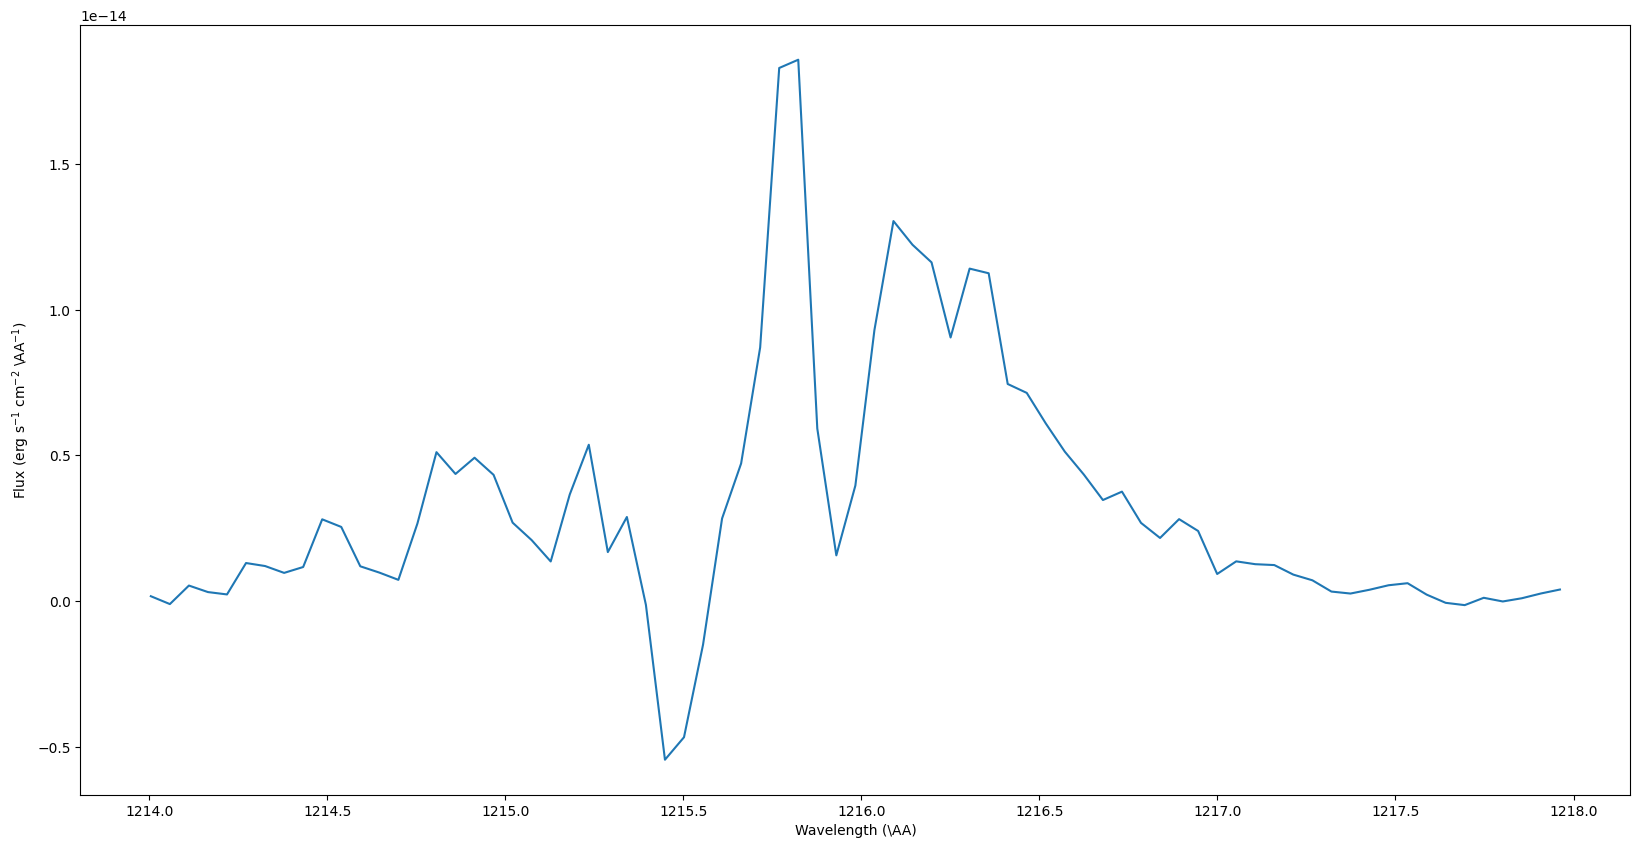

In [2]:
data = fits.getdata('spectra/hlsp_space_hst_stis_toi-1201_g140m_v1_component-spec.fits')
w, f , e, dq = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
mask = (w > 1214) & (w < 1218)
plt.figure(figsize=(20,10))

plt.plot(w[mask], f[mask])


plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.show()

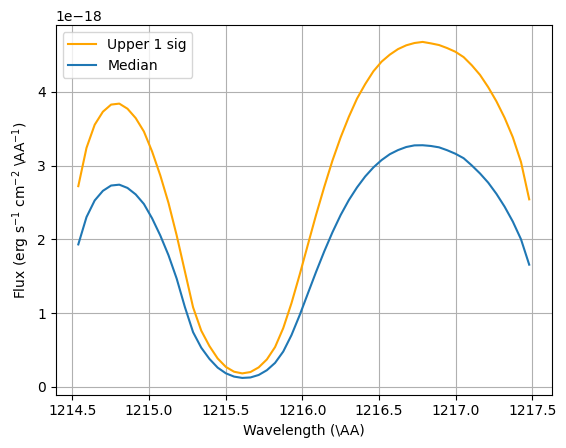

In [8]:
median = []
one_sig = []
wavelength = []

with open('what_MCMC_results.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        median.append(row[3])
        one_sig.append(row[4])
        wavelength.append(row[54])

median.pop(0)
one_sig.pop(0)
wavelength.pop(0)

wavelength = [float(i) for i in wavelength]
one_sig = [float(i) for i in one_sig]
median = [float(i) for i in median]

plt.plot(wavelength, one_sig, label = 'Upper 1 sig', color = "orange")
plt.plot(wavelength, median, label = 'Median')

plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend()
plt.grid(True)
plt.show()
plt.show()